In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
optuna_trials_result = pd.read_csv("../pretrained_optuna.csv")

In [3]:
optuna_trials_result

,trial,model_name,init_method,optimizer,lr,batch_size,dataset_class,train_loss,train_acc,value
0,0,resnet34,default,sgd,0.050,16,ImageClass1,0.8360,75.37,81.566148
1,1,alexnet,default,adam,0.050,32,ImageClass2,16.1034,62.60,76.123937
2,2,resnet18,kaiming,sgd,0.001,64,ImageClass1,1.4413,54.75,63.472763
3,3,resnet50,default,rmsprop,0.010,64,ImageClass2,0.3710,87.40,93.681652
4,4,resnet101,kaiming,rmsprop,0.010,16,ImageClass1,0.5510,85.16,88.326848
5,5,resnet18,kaiming,adam,0.001,16,ImageClass2,0.6852,75.72,85.297691
6,6,vgg16,kaiming,sgd,0.010,16,ImageClass2,0.8564,69.38,84.507898
7,7,resnet101,default,sgd,0.010,32,ImageClass2,0.7134,79.97,88.578372
8,8,resnet152,kaiming,sgd,0.050,32,ImageClass2,0.4546,86.14,92.648846
9,9,resnet50,xavier,adam,0.001,16,ImageClass2,0.4926,83.98,92.831106


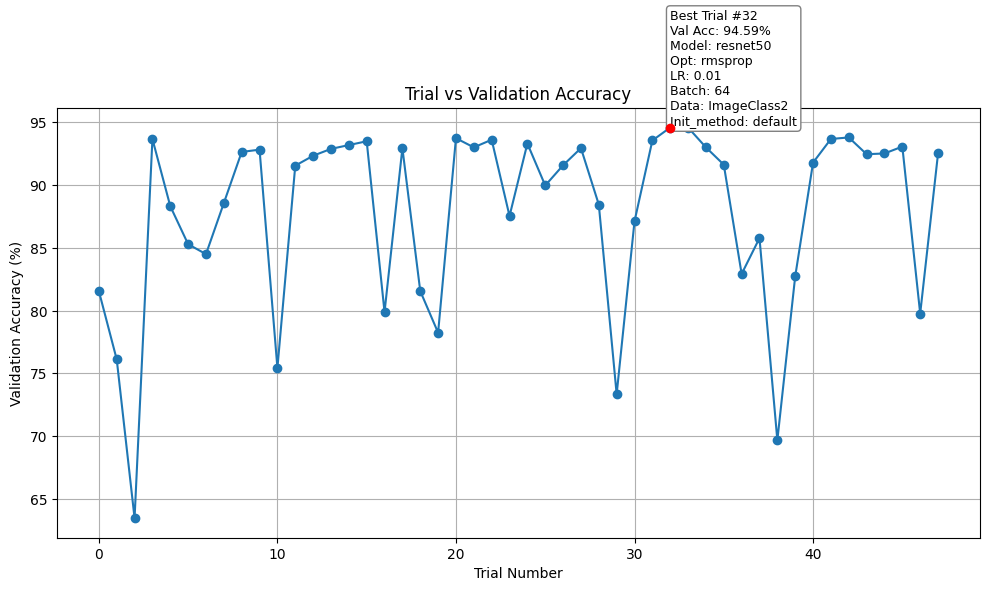

In [24]:
optuna_trials_result = optuna_trials_result.sort_values(by="trial")

# Plot trial vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(optuna_trials_result['trial'], optuna_trials_result['value'], marker='o', linestyle='-')
plt.title("Trial vs Validation Accuracy")
plt.xlabel("Trial Number")
plt.ylabel("Validation Accuracy (%)")

# Identify best trial
best_idx = optuna_trials_result['value'].idxmax()
best_trial = optuna_trials_result.loc[best_idx]
best_config_text = (
    f"Best Trial #{int(best_trial['trial'])}\n"
    f"Val Acc: {best_trial['value']:.2f}%\n"
    f"Model: {best_trial['model_name']}\n"
    f"Opt: {best_trial['optimizer']}\n"
    f"LR: {best_trial['lr']}\n"
    f"Batch: {best_trial['batch_size']}\n"
    f"Data: {best_trial['dataset_class']}\n"
    f"Init_method: {best_trial['init_method']}"

)

# Annotate the best trial
plt.scatter(best_trial['trial'], best_trial['value'], color='red', zorder=5)
plt.text(best_trial['trial'], best_trial['value'], best_config_text,
         fontsize=9, verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.grid(True)
plt.tight_layout()
plt.show()


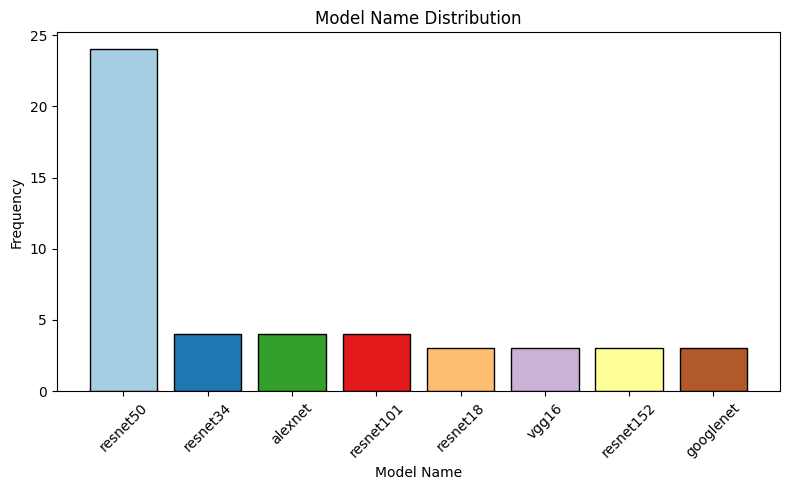

In [17]:
model_counts = optuna_trials_result["model_name"].value_counts()

# Generate unique colors for each model
colors = plt.cm.Paired(np.linspace(0, 1, len(model_counts)))

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_counts.index, model_counts.values, color=colors, edgecolor='black')
plt.title("Model Name Distribution")
plt.xlabel("Model Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

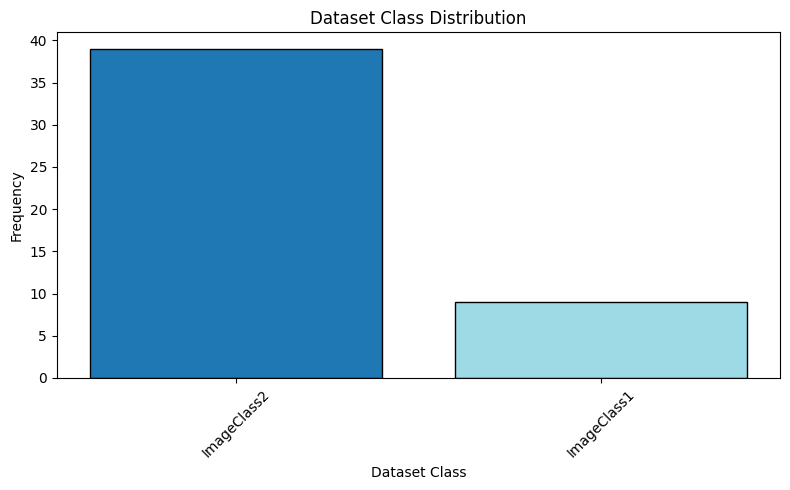

In [16]:
value_counts = optuna_trials_result["dataset_class"].value_counts()

# Generate unique colors per bar
colors = plt.cm.tab20(np.linspace(0, 1, len(value_counts)))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')
plt.title("Dataset Class Distribution")
plt.xlabel("Dataset Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


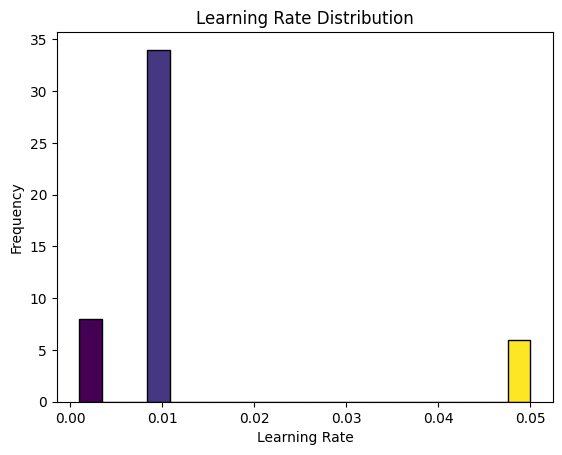

In [13]:
data = optuna_trials_result['lr']
counts, bins = np.histogram(data, bins=20)
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))  # You can change colormap

for i in range(len(counts)):
    plt.bar(bins[i], counts[i], width=bins[i+1]-bins[i], color=colors[i], align='edge', edgecolor='black')

plt.title("Learning Rate Distribution")
plt.xlabel("Learning Rate")
plt.ylabel("Frequency")
plt.show()

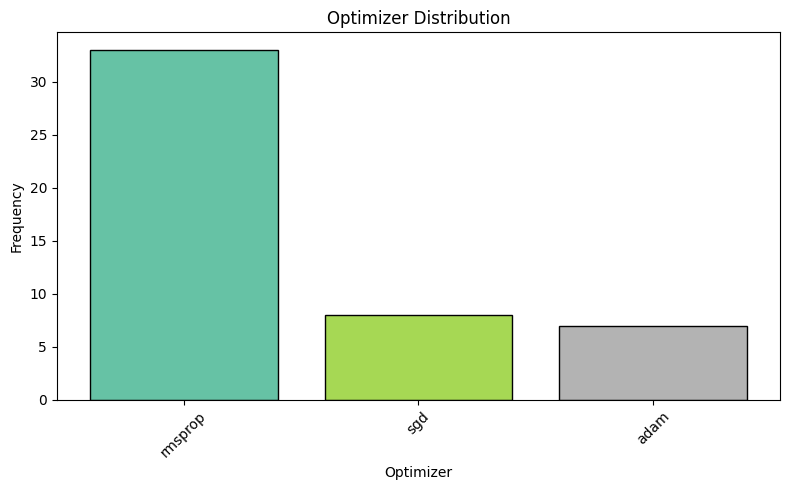

In [20]:
# optimizer
optimizer_counts = optuna_trials_result["optimizer"].value_counts()

# Generate a distinct color for each optimizer
colors = plt.cm.Set2(np.linspace(0, 1, len(optimizer_counts)))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(optimizer_counts.index, optimizer_counts.values, color=colors, edgecolor='black')
plt.title("Optimizer Distribution")
plt.xlabel("Optimizer")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
